1.1.1读取数据

In [8]:
import pandas as pd
csv = pd.read_csv('data/sample.csv')
csv

,id,name,scores
0,0,小明,78.0
1,1,小红,87.0
2,2,小白,99.0
3,3,小青,9999.0
4,4,小兰,NaN


In [9]:
csv = pd.read_csv('data/sample.csv',\
                   usecols=['id','name'],\
                   nrows=2) #读取'id'和'name'两列，仅读取前两行
csv


,id,name
0,0,小明
1,1,小红


In [13]:
csvs = pd.read_csv('data/big.csv',chunksize=900)
for i in csvs:
    print (i.shape)


(900, 5)
(900, 5)
(900, 5)
(900, 5)
(900, 5)


In [14]:
csvs = pd.read_csv('data/big.csv',chunksize=900)
dat = pd.concat(csvs,ignore_index=True)
dat.shape


(4500, 5)

In [15]:
csv = pd.read_csv('data/sample.csv',
                  na_values='99999')
csv


,id,name,scores
0,0,小明,78.0
1,1,小红,87.0
2,2,小白,99.0
3,3,小青,9999.0
4,4,小兰,NaN


In [16]:
csv = pd.read_csv('data/sample.csv',
                  encoding='utf-8')
csv


,id,name,scores
0,0,小明,78.0
1,1,小红,87.0
2,2,小白,99.0
3,3,小青,9999.0
4,4,小兰,NaN


In [17]:
csv.to_csv('data/write.csv',encoding='utf-8',index=False)

1.2.1 行列操作

In [18]:
import numpy as np
import pandas as pd
np.random.seed(0) #为保证代码每次运行都能得到相同的一组数据，设置随机数种子
sample = pd.DataFrame(np.random.randn(4,5)
                     ,columns=list("abcde")
                     )
sample

,a,b,c,d,e
0,1.764052,0.400157,0.978738,2.240893,1.867558
1,-0.977278,0.950088,-0.151357,-0.103219,0.410599
2,0.144044,1.454274,0.761038,0.121675,0.443863
3,0.333674,1.494079,-0.205158,0.313068,-0.854096


In [19]:
sample['a']

0    1.764052
1   -0.977278
2    0.144044
3    0.333674
Name: a, dtype: float64

In [20]:
sample.iloc[:,0]

0    1.764052
1   -0.977278
2    0.144044
3    0.333674
Name: a, dtype: float64

In [21]:
sample.loc[:,"a"]

0    1.764052
1   -0.977278
2    0.144044
3    0.333674
Name: a, dtype: float64

In [22]:
sample[['a']]

,a
0,1.764052
1,-0.977278
2,0.144044
3,0.333674


In [23]:
sample.loc[:1,:"b"]

,a,b
0,1.764052,0.400157
1,-0.977278,0.950088


In [24]:
sample.iloc[0:2,0:2]

,a,b
0,1.764052,0.400157
1,-0.977278,0.950088


In [25]:
sample['new_col'] = sample['a'] - sample['b']
sample

,a,b,c,d,e,new_col
0,1.764052,0.400157,0.978738,2.240893,1.867558,1.363895
1,-0.977278,0.950088,-0.151357,-0.103219,0.410599,-1.927366
2,0.144044,1.454274,0.761038,0.121675,0.443863,-1.310230
3,0.333674,1.494079,-0.205158,0.313068,-0.854096,-1.160405


In [26]:
sample.assign(new_col2 = sample['a'] - sample['b'],
                  new_col3 = sample['a'] + sample['b'])


,a,b,c,d,e,new_col,new_col2,new_col3
0,1.764052,0.400157,0.978738,2.240893,1.867558,1.363895,1.363895,2.164210
1,-0.977278,0.950088,-0.151357,-0.103219,0.410599,-1.927366,-1.927366,-0.027189
2,0.144044,1.454274,0.761038,0.121675,0.443863,-1.310230,-1.310230,1.598317
3,0.333674,1.494079,-0.205158,0.313068,-0.854096,-1.160405,-1.160405,1.827753


In [27]:
sample.drop(columns='a')

,b,c,d,e,new_col
0,0.400157,0.978738,2.240893,1.867558,1.363895
1,0.950088,-0.151357,-0.103219,0.410599,-1.927366
2,1.454274,0.761038,0.121675,0.443863,-1.310230
3,1.494079,-0.205158,0.313068,-0.854096,-1.160405


In [28]:
sample.drop(columns=['a','b'])

,c,d,e,new_col
0,0.978738,2.240893,1.867558,1.363895
1,-0.151357,-0.103219,0.410599,-1.927366
2,0.761038,0.121675,0.443863,-1.310230
3,-0.205158,0.313068,-0.854096,-1.160405


1.2.2 条件查询

In [29]:
sample =pd.DataFrame({'group':[1,1,1,2,1,2]
                      ,'name':['Bob','Lindy','Mark','Miki','Sully','Rose']
                      ,'score':[98,78,87,77,65,67]
                      ,})
sample

,group,name,score
0,1,Bob,98
1,1,Lindy,78
2,1,Mark,87
3,2,Miki,77
4,1,Sully,65
5,2,Rose,67


In [30]:
sample.score > 70

0     True
1     True
2     True
3     True
4    False
5    False
Name: score, dtype: bool

In [31]:
sample[sample.score > 70]

,group,name,score
0,1,Bob,98
1,1,Lindy,78
2,1,Mark,87
3,2,Miki,77


In [32]:
sample[(sample.score > 70) & (sample.group ==1)] #且

,group,name,score
0,1,Bob,98
1,1,Lindy,78
2,1,Mark,87


In [33]:
sample[~(sample.group ==1)] #非

,group,name,score
3,2,Miki,77
5,2,Rose,67


In [34]:
sample[(sample.group ==2) | (sample.group ==1)]

,group,name,score
0,1,Bob,98
1,1,Lindy,78
2,1,Mark,87
3,2,Miki,77
4,1,Sully,65
5,2,Rose,67


In [35]:
sample.query('score > 90')

,group,name,score
0,1,Bob,98


In [36]:
sample.query('(group ==2) |(group == 1)')

,group,name,score
0,1,Bob,98
1,1,Lindy,78
2,1,Mark,87
3,2,Miki,77
4,1,Sully,65
5,2,Rose,67


In [38]:
sample[sample['score'].between(70,80),inclusive=True]

,group,name,score
1,1,Lindy,78
3,2,Miki,77


In [39]:
sample[sample['name'].isin(['Bob','Lindy'])]

,group,name,score
0,1,Bob,98
1,1,Lindy,78


In [40]:
sample[sample['name'].str.contains('[M]+')]

,group,name,score
2,1,Mark,87
3,2,Miki,77


1.2.3 横向连接

In [42]:
df1 = pd.DataFrame({ 'col1':['a','b','c'],
                     'id':[1,2,3],
                   })
df2 = pd.DataFrame({ 'col2':['d','e'],
                    'id':[4,3],
                   })

In [43]:
df1

,col1,id
0,a,1
1,b,2
2,c,3


In [44]:
df2

,col2,id
0,d,4
1,e,3


In [45]:
df1.merge(df2,how='inner',on='id')

,col1,id,col2
0,c,3,e


In [46]:
df1.merge(df2,how='inner',left_on='id',right_on='id')

,col1,id,col2
0,c,3,e


In [47]:
df1.merge(df2,how='left',on='id')

,col1,id,col2
0,a,1,NaN
1,b,2,NaN
2,c,3,e


In [48]:
df1.merge(df2,how='right',on='id')

,col1,id,col2
0,NaN,4,d
1,c,3,e


In [49]:
df1.merge(df2,how='outer',on='id')

,col1,id,col2
0,a,1,NaN
1,b,2,NaN
2,c,3,e
3,NaN,4,d


In [50]:
df1 = pd.DataFrame({'id1':[1,2,3],
                    'col1':['a','b','c']},
                  index = [1,2,3])
df2 = pd.DataFrame({'id2':[1,2,3],
                    'col2':['aa','bb','cc']},
                  index = [1,3,2])

In [51]:
df1

,id1,col1
1,1,a
2,2,b
3,3,c


In [52]:
df2

,id2,col2
1,1,aa
3,2,bb
2,3,cc


In [53]:
pd.concat([df1,df2],axis=1)

,id1,col1,id2,col2
1,1,a,1,aa
2,2,b,3,cc
3,3,c,2,bb


In [54]:
df1.join(df2)

,id1,col1,id2,col2
1,1,a,1,aa
2,2,b,3,cc
3,3,c,2,bb


1.2.4 纵向合并

In [55]:
df1 = pd.DataFrame({'id':[1,1,1,2,3,4,6],
                    'col':['a','a','b','c','v','e','q']})
df2 = pd.DataFrame({'id':[1,2,3,3,5],
                    'col':['x','y','z','v','w']})

In [56]:
df1

,id,col
0,1,a
1,1,a
2,1,b
3,2,c
4,3,v
5,4,e
6,6,q


In [57]:
df2

,id,col
0,1,x
1,2,y
2,3,z
3,3,v
4,5,w


In [58]:
pd.concat([df1,df2],ignore_index=True,axis=0)

,id,col
0,1,a
1,1,a
2,1,b
3,2,c
4,3,v
5,4,e
6,6,q
7,1,x
8,2,y
9,3,z


In [59]:
pd.concat([df1,df2],ignore_index=True).drop_duplicates()

,id,col
0,1,a
2,1,b
3,2,c
4,3,v
5,4,e
6,6,q
7,1,x
8,2,y
9,3,z
11,5,w


In [60]:
df3 = df1.rename(columns = {'col':'new_col'})
df3

,id,new_col
0,1,a
1,1,a
2,1,b
3,2,c
4,3,v
5,4,e
6,6,q


In [61]:
pd.concat([df1,df3],ignore_index=True).drop_duplicates()

,id,col,new_col
0,1,a,NaN
2,1,b,NaN
3,2,c,NaN
4,3,v,NaN
5,4,e,NaN
6,6,q,NaN
7,1,NaN,a
9,1,NaN,b
10,2,NaN,c
11,3,NaN,v


1.2.5 排序

In [62]:
sample=pd.DataFrame({'group':[1,1,1,2,1,2],
                    'name':['Bob','Lindy','Mark','Miki','Sully','Rose'],
                    'score':[98,78,87,77,77,np.nan],
                    })
sample

,group,name,score
0,1,Bob,98.0
1,1,Lindy,78.0
2,1,Mark,87.0
3,2,Miki,77.0
4,1,Sully,77.0
5,2,Rose,NaN


In [63]:
sample.sort_values('score',ascending=False,na_position='last')

,group,name,score
0,1,Bob,98.0
2,1,Mark,87.0
1,1,Lindy,78.0
3,2,Miki,77.0
4,1,Sully,77.0
5,2,Rose,NaN


In [64]:
sample.sort_values(['group','score']) 

,group,name,score
4,1,Sully,77.0
1,1,Lindy,78.0
2,1,Mark,87.0
0,1,Bob,98.0
3,2,Miki,77.0
5,2,Rose,NaN


1.2.6 分组汇总

In [65]:
sample = pd.DataFrame({"name":['Bob','Lindy','Mark','Miki','Sully','Rose']
                        ,"class":[1,1,1,2,1,2]
                        ,"grade":[1,1,1,2,2,2]
                        ,"chinese":[88,78,86,56,77,54]
                        ,"math":[98,78,87,77,77,np.nan]
                        })
sample

,name,class,grade,chinese,math
0,Bob,1,1,88,98.0
1,Lindy,1,1,78,78.0
2,Mark,1,1,86,87.0
3,Miki,2,2,56,77.0
4,Sully,1,2,77,77.0
5,Rose,2,2,54,NaN


In [66]:
sample.groupby('grade')[['math']].max()

,math
grade,
1,98.0
2,77.0


In [67]:
sample.groupby(['grade','class'])[['math']].mean()

math
grade class           
1     1      87.666667
2     1      77.000000
      2      77.000000

In [68]:
sample.groupby(['grade']) [['math','chinese']].mean()

,math,chinese
grade,,
1,87.666667,84.000000
2,77.000000,62.333333


In [69]:
sample.groupby('class')['math'].agg(['mean','min','max'])

,mean,min,max
class,,,
1,85.0,77.0,98.0
2,77.0,77.0,77.0


In [70]:
df = sample.groupby(['grade','class']) [['math','chinese']].agg(['min','max'])
df

math       chinese    
              min   max     min max
grade class                        
1     1      78.0  98.0      78  88
2     1      77.0  77.0      77  77
      2      77.0  77.0      54  56

In [71]:
df['math']['min']

grade  class
1      1        78.0
2      1        77.0
       2        77.0
Name: min, dtype: float64

In [72]:
df.loc[:,('math','min')]

grade  class
1      1        78.0
2      1        77.0
       2        77.0
Name: (math, min), dtype: float64

In [73]:
df.loc[(2,2),('math','min')]

77.0

1.2.7 拆分列

In [74]:
table = pd.DataFrame({ 'Monetary':[3608,420,1894,3503,4567],
                        'cust_id':[10001,10001,10002,10002,10003],
                        'type':['Normal','Special_offer',\
                        'Normal','Special_offer','Special_offer']
                     })
table 

,Monetary,cust_id,type
0,3608,10001,Normal
1,420,10001,Special_offer
2,1894,10002,Normal
3,3503,10002,Special_offer
4,4567,10003,Special_offer


In [75]:
pd.pivot_table(table,index='cust_id',columns='type',values='Monetary')

type,Normal,Special_offer
cust_id,,
10001,3608.0,420.0
10002,1894.0,3503.0
10003,NaN,4567.0


In [76]:
pd.pivot_table(table,index='cust_id',columns='type',values='Monetary',
        fill_value=0,aggfunc='sum')

type,Normal,Special_offer
cust_id,,
10001,3608,420
10002,1894,3503
10003,0,4567


1.2.8 赋值与条件赋值

In [77]:
sample = pd.DataFrame({'name':['Bob','Lindy','Mark',
        'Miki','Sully','Rose'],
        'score':[99,78,999,77,77,np.nan],
        'group':[1,1,1,2,1,2],})
sample

,name,score,group
0,Bob,99.0,1
1,Lindy,78.0,1
2,Mark,999.0,1
3,Miki,77.0,2
4,Sully,77.0,1
5,Rose,NaN,2


In [78]:
sample.score.replace(999,np.nan)

0    99.0
1    78.0
2     NaN
3    77.0
4    77.0
5     NaN
Name: score, dtype: float64

In [79]:
sample.replace({'score':{999:np.nan},
                'name':{'Bob':np.nan}})


,name,score,group
0,NaN,99.0,1
1,Lindy,78.0,1
2,Mark,NaN,1
3,Miki,77.0,2
4,Sully,77.0,1
5,Rose,NaN,2


In [80]:
sample

,name,score,group
0,Bob,99.0,1
1,Lindy,78.0,1
2,Mark,999.0,1
3,Miki,77.0,2
4,Sully,77.0,1
5,Rose,NaN,2


In [81]:
def transform(row):
    if row['group'] == 1:
        return ('class1')
    elif row['group'] == 2:
        return ('class2')  

sample.apply(transform,axis=1)

0    class1
1    class1
2    class1
3    class2
4    class1
5    class2
dtype: object

In [82]:
sample.assign(class_n = sample.apply(transform,axis=1))

,name,score,group,class_n
0,Bob,99.0,1,class1
1,Lindy,78.0,1,class1
2,Mark,999.0,1,class1
3,Miki,77.0,2,class2
4,Sully,77.0,1,class1
5,Rose,NaN,2,class2


In [83]:
sample = sample.copy()
sample.loc[sample.group==1,'class_n']='class1'
sample.loc[sample.group==2,'class_n']='class2'
sample

,name,score,group,class_n
0,Bob,99.0,1,class1
1,Lindy,78.0,1,class1
2,Mark,999.0,1,class1
3,Miki,77.0,2,class2
4,Sully,77.0,1,class1
5,Rose,NaN,2,class2


1.3.1 重复值处理

In [84]:
sample = pd.DataFrame({'group':[1,1,1,2,1,2],
                        'id':[1,1,1,3,4,5],
                       'name':['Bob','Bob','Mark','Miki','Sully','Rose'],
                       'score':[99,99,87,77,77,np.nan],
                       })
sample

,group,id,name,score
0,1,1,Bob,99.0
1,1,1,Bob,99.0
2,1,1,Mark,87.0
3,2,3,Miki,77.0
4,1,4,Sully,77.0
5,2,5,Rose,NaN


In [85]:
sample[sample.duplicated()]

,group,id,name,score
1,1,1,Bob,99.0


In [86]:
sample.drop_duplicates()

,group,id,name,score
0,1,1,Bob,99.0
2,1,1,Mark,87.0
3,2,3,Miki,77.0
4,1,4,Sully,77.0
5,2,5,Rose,NaN


In [87]:
sample.drop_duplicates('id')

,group,id,name,score
0,1,1,Bob,99.0
3,2,3,Miki,77.0
4,1,4,Sully,77.0
5,2,5,Rose,NaN


1.3.2 缺失值处理

In [91]:
sample = pd.DataFrame({'group':[1,1,np.nan,2,1,np.nan],
                        'id':[1,1,1,3,4,np.nan],
                       'name':['Bob','Bob','Mark','Miki','Sully',np.nan],
                       'score':[99,np.nan,87,77,77,np.nan],
                       })
sample

,group,id,name,score
0,1.0,1.0,Bob,99.0
1,1.0,1.0,Bob,NaN
2,NaN,1.0,Mark,87.0
3,2.0,3.0,Miki,77.0
4,1.0,4.0,Sully,77.0
5,NaN,NaN,NaN,NaN


In [92]:
sample.apply(lambda col:sum(col.isnull())/col.size)

group    0.333333
id       0.166667
name     0.166667
score    0.333333
dtype: float64

In [93]:
sample.score.fillna(sample.score.mean())

0    99.0
1    85.0
2    87.0
3    77.0
4    77.0
5    85.0
Name: score, dtype: float64

In [94]:
sample.score.fillna(sample.score.median())

0    99.0
1    82.0
2    87.0
3    77.0
4    77.0
5    82.0
Name: score, dtype: float64

In [95]:
sample.score.isnull()

0    False
1     True
2    False
3    False
4    False
5     True
Name: score, dtype: bool

In [96]:
sample.score.isnull().apply(int)

0    0
1    1
2    0
3    0
4    0
5    1
Name: score, dtype: int64

1.3.3 噪声值处理

In [97]:
def cap(x,quantile=[0.01,0.99]):
    """盖帽法处理异常值
    Args：
        x：pd.Series列，连续变量
        quantile：指定盖帽法的上下分位数范围
    """

# 生成分位数
    Q01,Q99=x.quantile(quantile).values.tolist()

# 替换异常值为指定的分位数
    if Q01 > x.min():
        x = x.copy()
        x.loc[x<Q01] = Q01

    if Q99 < x.max():
        x = x.copy()
        x.loc[x>Q99] = Q99

    return(x)


array([[<AxesSubplot:title={'center':'normal'}>]], dtype=object)

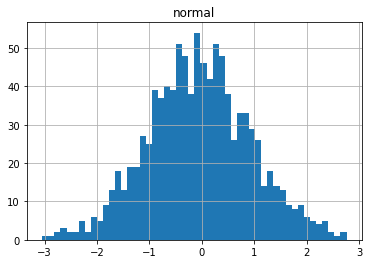

In [98]:
sample = pd.DataFrame({'normal':np.random.randn(1000)})
sample.hist(bins=50)

array([[<AxesSubplot:title={'center':'normal'}>]], dtype=object)

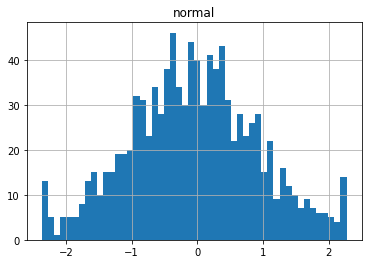

In [99]:
new = sample.apply(cap,quantile=[0.01,0.99])
new.hist(bins=50)

In [100]:
np.random.seed(0)
sample =pd.DataFrame({'normal':np.random.randn(10)})
sample

,normal
0,1.764052
1,0.400157
2,0.978738
3,2.240893
4,1.867558
5,-0.977278
6,0.950088
7,-0.151357
8,-0.103219
9,0.410599


In [101]:
pd.cut(sample.normal,5)

0     (1.597, 2.241]
1      (0.31, 0.954]
2     (0.954, 1.597]
3     (1.597, 2.241]
4     (1.597, 2.241]
5    (-0.98, -0.334]
6      (0.31, 0.954]
7     (-0.334, 0.31]
8     (-0.334, 0.31]
9      (0.31, 0.954]
Name: normal, dtype: category
Categories (5, interval[float64, right]): [(-0.98, -0.334] < (-0.334, 0.31] < (0.31, 0.954] < (0.954, 1.597] < (1.597, 2.241]]

In [102]:
 pd.cut(sample.normal,bins=5,labels=[1,2,3,4,5])

0    5
1    3
2    4
3    5
4    5
5    1
6    3
7    2
8    2
9    3
Name: normal, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [103]:
pd.cut(sample.normal,bins=2,labels=['bad','good'])

0    good
1     bad
2    good
3    good
4    good
5     bad
6    good
7     bad
8     bad
9     bad
Name: normal, dtype: category
Categories (2, object): ['bad' < 'good']

In [104]:
sample.normal.quantile([0,0.5,1])

0.0   -0.977278
0.5    0.680343
1.0    2.240893
Name: normal, dtype: float64

In [105]:
pd.cut(sample.normal,bins=sample.normal.quantile([0,0.5,1]),
 include_lowest=True)

0     (0.68, 2.241]
1    (-0.978, 0.68]
2     (0.68, 2.241]
3     (0.68, 2.241]
4     (0.68, 2.241]
5    (-0.978, 0.68]
6     (0.68, 2.241]
7    (-0.978, 0.68]
8    (-0.978, 0.68]
9    (-0.978, 0.68]
Name: normal, dtype: category
Categories (2, interval[float64, right]): [(-0.978, 0.68] < (0.68, 2.241]]

In [106]:
 pd.cut(sample.normal,bins=sample.normal.quantile([0,0.5,1]),labels=['bad','good'],
 include_lowest=True)

0    good
1     bad
2    good
3    good
4    good
5     bad
6    good
7     bad
8     bad
9     bad
Name: normal, dtype: category
Categories (2, object): ['bad' < 'good']